In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.PhotoPreprocessor import preprocess
import imutils
from path import Path
import lmdb
import sys
from ipynb.fs.full.PhotoScaner import *
sys.path.append('trained_model/src')
import warnings
warnings.filterwarnings('ignore')
from main import get_predict_from_roi, init_model

In [2]:
def find_bounds(line):
    line_width = 0
    line_height = 0
    min_x = 10000000
    max_w = -1
    min_y = 10000000
    max_h = -1
    sum_y = 0
    count = 0
    for word in line:
        x,y,w,h = word
        count+=1
        if(x<min_x):
            min_x = x
        if(x+w>max_w):
            max_w = x+w
        if(y<min_y):
            min_y = y
        if(y+h>max_h):
            max_h =y+h
    line_width = max_w-min_x
    line_height = max_h-min_y
    return (min_x, min_y, line_width, line_height)

In [3]:
def delete_contours(j, contours, curr_contour):
    x,y,w,h = curr_contour
    while j<len(contours):
        x1,y1,w1,h1=find_bounds(contours[j])
        if(y<=y1+h1/2 and (y+h)>=(y1+h1/2)):
            if(x<=x1 and (x+w)>=(x1+w1)):
                del(contours[j])
        j+=1

In [4]:
def draw_lines(lines, img):
    img_copy = img.copy()
    line_separated = []
    for line in lines:
        x,y,w,h = find_bounds(line)
        line_separated+=[img[y:y+h,x:x+w]]
        cv2.rectangle(img_copy,(x,y),( x + w, y + h ),(90,0,255),2)
    return (img_copy,line_separated)

In [5]:
def get_predict_for_img_demo(IMG_PATH):
    lines,img = preprocess(IMG_PATH)
    i = 0
    model = init_model()
    result = ""
    while i<len(lines):
        x,y,w,h=find_bounds(lines[i])
        delete_contours(i+1,lines, find_bounds(lines[i]))
        i+=1
        roi = img[y:y+h,x:x+w] 
        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        pxmin = np.min(gray)
        pxmax = np.max(gray)
        imgContrast = (gray - pxmin) / (pxmax - pxmin) * 255
        morph = cv2.erode(imgContrast, np.ones((2,2),np.uint8), iterations=1)
        res,prob = get_predict_from_roi(morph,model)
        if(res!="." or len(res)!=1):
            result+=res+"\n"
    img_copy,lines_list = draw_lines(lines, img)
    plt.figure(figsize=(30,30))
    plt.imshow(img_copy)
    return result

Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Tensorflow: 1.14.0
Init with stored values from trained_model/model/snapshot-13
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from trained_model/model/snapshot-13
Write dump of NN to file: trained_model/dump/rnnOutput_0.csv
Write dump of NN to file: trained_model/dump/rnnOutput_0.csv
Write dump of NN to file: trained_model/dump/rnnOutput_0.csv
Write dump of NN to file: trained_model/dump/rnnOutput_0.csv
Write dump of NN to file: trained_model/dump/rnnOutput_0.csv
Write dump of NN to file: trained_model/dump/rnnOutput_0.csv
Write dump of NN to file: trained_model/dump/rnnOutput_0.csv
Write dump of NN to file: trained_model/dump/rnnOutput_0.csv
Write dump of NN to file: trained_model/dump/rnnOutput_0.csv
Write dump of NN

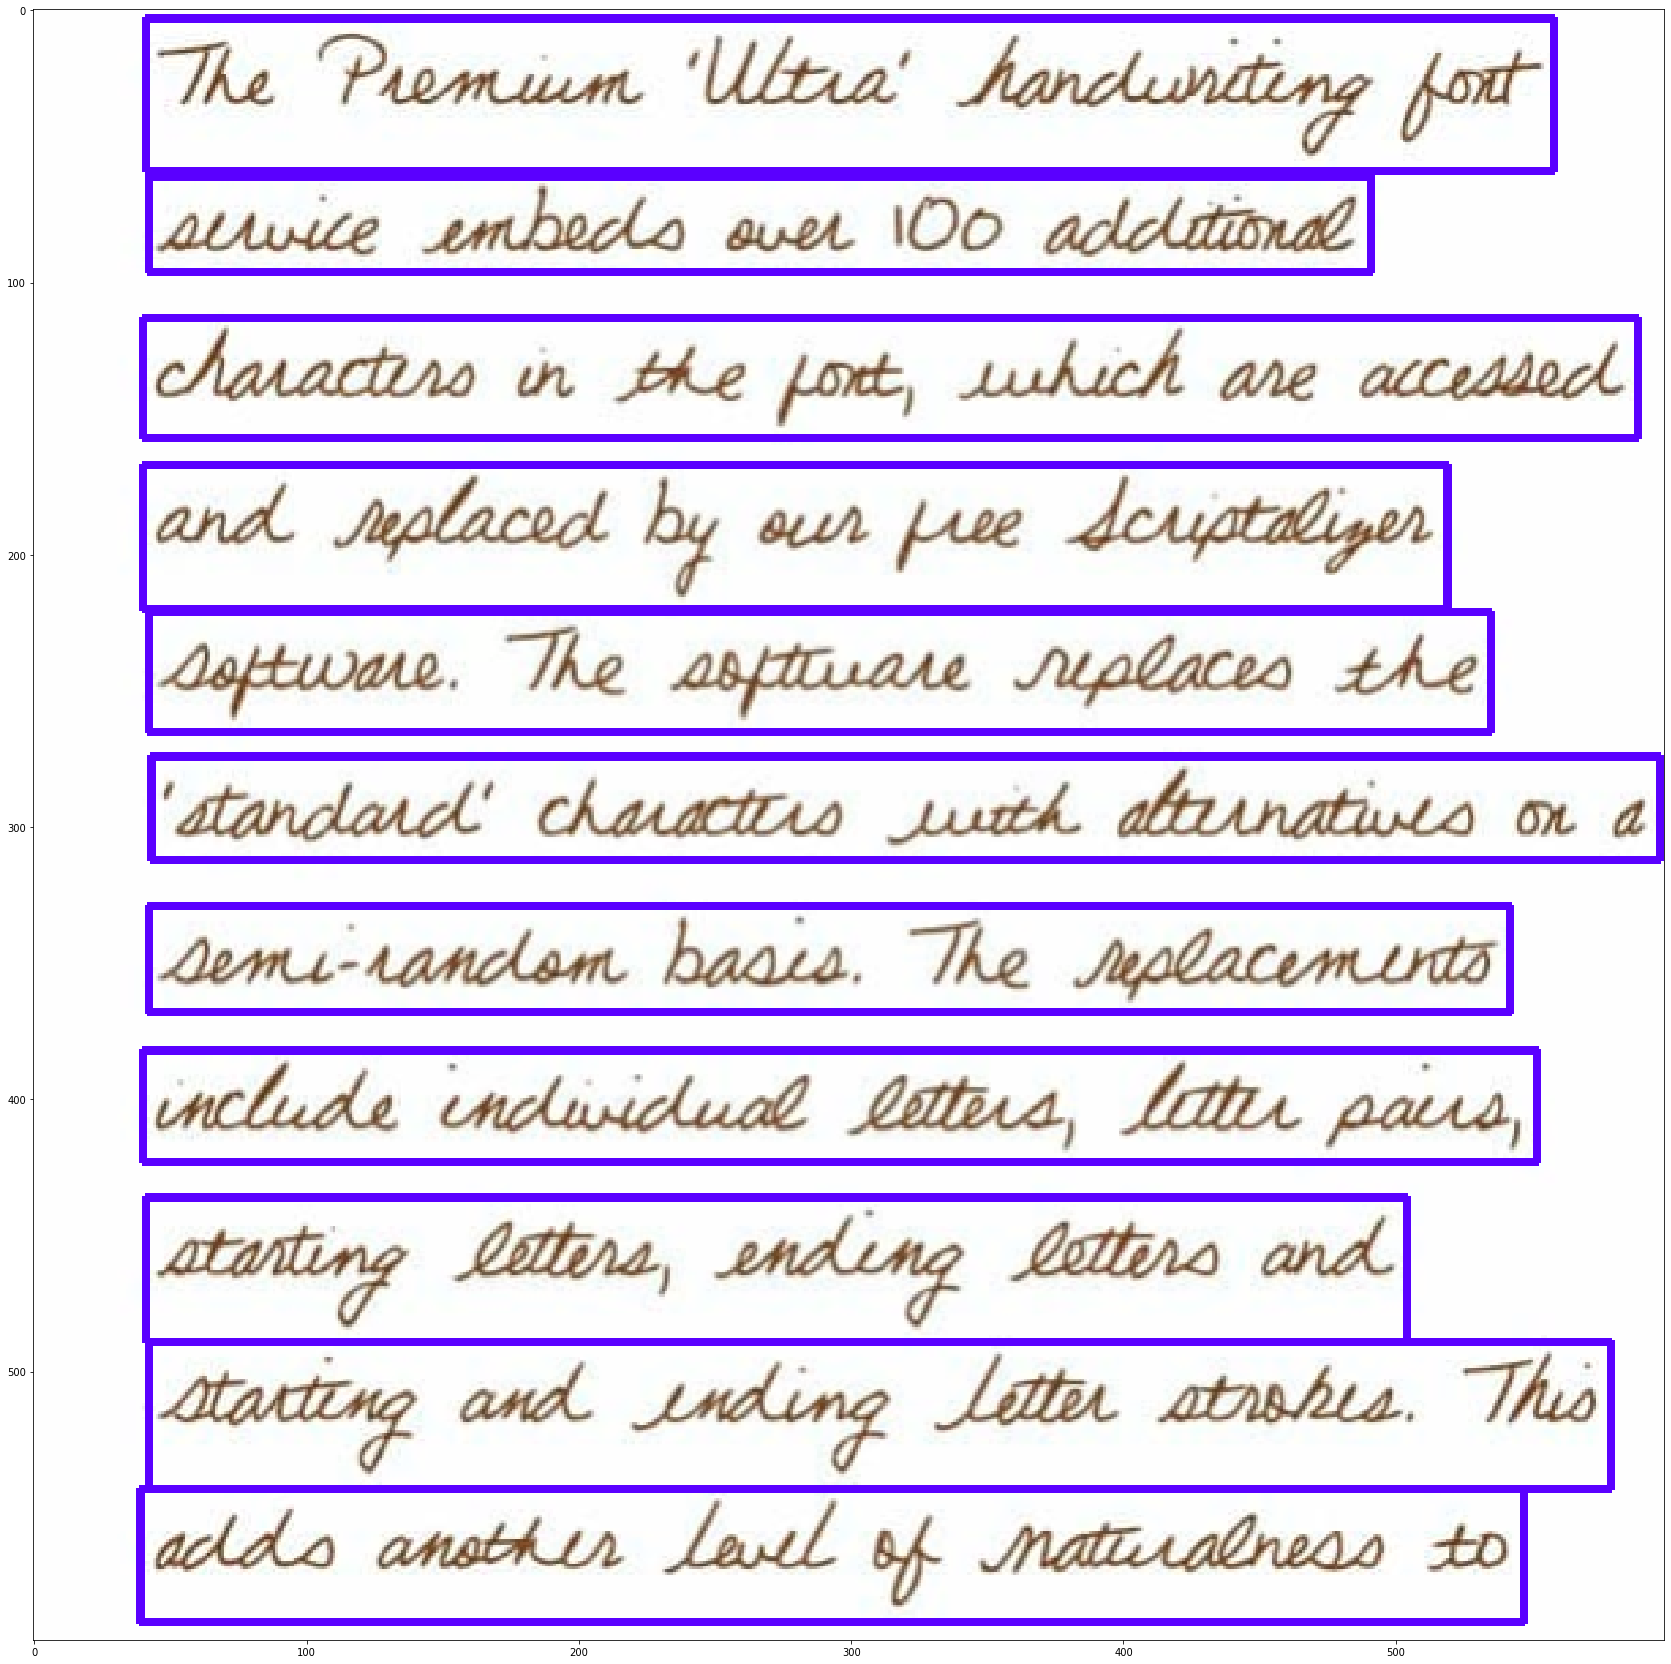

In [6]:
result_str = get_predict_for_img_demo("photo_2021-06-01_17-27-57.jpg")


In [7]:
print(result_str)

The Premier lea handwriting jost
service embeds aver ,100 addition
characters in the port which are accessed
and su laced by or fee deities
software The apace places the
standard characters with donates or a
semi-Landen basis The replacements
include individual letters lot pains
starting lectern ending letters and
starting and ending lode twee This
adds another level of naturalness to

